<a href="https://colab.research.google.com/github/JnrRoland/Agrupamento-usando-K-Means/blob/main/Agrupamento_de_dados_com_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  1) Importar bibliotecas

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import plotly.graph_objects as go

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 2) Ler Dataset

In [4]:
file_path = '/content/gdrive/MyDrive/Repositórios_Git/Agrupamento_K-Means/Mall_Customers.csv'
df = pd.read_csv(file_path)

Atributos do conjunto de dados:
* CustomerID : ID exclusivo do cliente
* Gender : Gênero do cliente (Male ou Female)
* Age : Idade do cliente
* Annual Income (k$) : Renda anual do cliente
* Spending Score (1-100) : Pontuação atribuída pelo shopping com base no comportamento do cliente e na natureza dos gastos

# 3) Informações do Dataset

In [5]:
df.shape

(200, 5)

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**Resumo**
* Nenhum valor nulo
* 200 registros
* A idade média é 38
* A pontuação de gastos tem uma média de 50

*Alterar o nome das colunas para nomes em portugues*

In [10]:
df = df.rename(columns={'CustomerID': 'ID_cliente', 'Gender': 'Genero', 'Age': 'Idade', 'Annual Income (k$)': 'Renda_Anual', 'Spending Score (1-100)': 'Pontuacao_gastos(1-100)' })

In [11]:
print(df.columns)

Index(['ID_cliente', 'Genero', 'Idade', 'Renda_Anual',
       'Pontuacao_gastos(1-100)'],
      dtype='object')


# 4) Análise Exploratória dos Dados

4.1 Distribuições

4.1.1 Distribuições de recursos numéricos


<Figure size 1500x500 with 0 Axes>

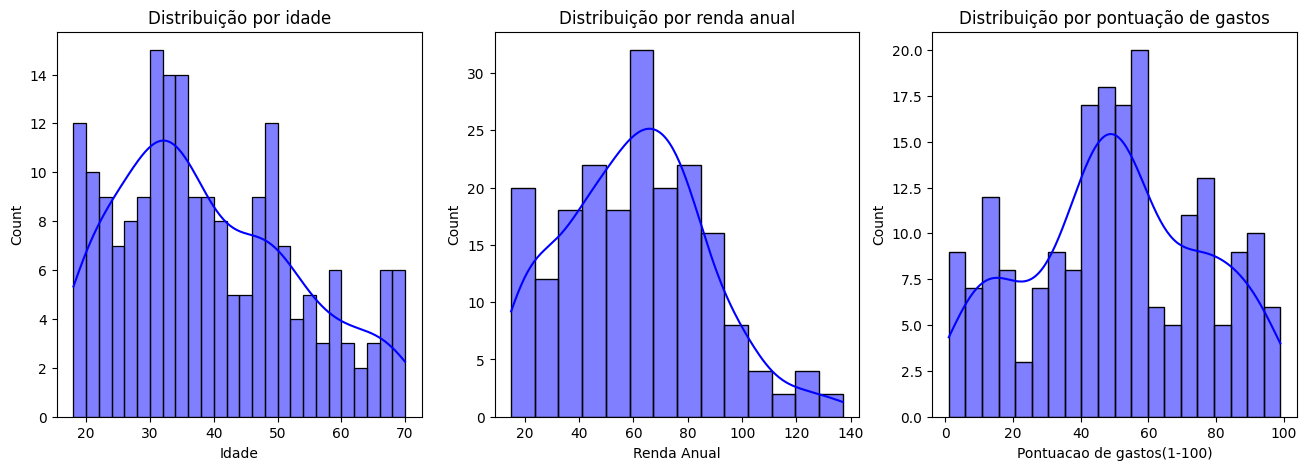

In [12]:
# Tamanho geral da figura
plt.figure(figsize=(15,5))

# Criando subplots: 1 linha, 3 colunas
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Distribuição etária
sns.histplot(df['Idade'], kde=True, color='b', ax=axes[0], bins=26)
axes[0].set_title('Distribuição por idade')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Count')

# Plot 2: Distribuição anual de renda
sns.histplot(df['Renda_Anual'], kde=True, color='b', ax=axes[1], bins=14)
axes[1].set_title('Distribuição por renda anual')
axes[1].set_xlabel('Renda Anual')
axes[1].set_ylabel('Count')

# Plot 3: Distribuição da pontuação de gastos
sns.histplot(df['Pontuacao_gastos(1-100)'], kde=True, color='b', ax=axes[2], bins=20)
axes[2].set_title('Distribuição por pontuação de gastos')
axes[2].set_xlabel('Pontuacao de gastos(1-100)')
axes[2].set_ylabel('Count')

plt.show()

**Insights**


1.   Idade
* A idade está espalhada por diversas faixas etárias
* A maioria dos visitantes do shopping tem entre 20 e 40 anos, com pico de idade na faixa dos 30 aos 35 anos.
* Menos visitantes têm mais de 50 anos.

**Conclusão:** O shopping atrai principalmente clientes jovens e de meia idade, com pico em torno dos 30 anos.

2. Renda Anual
* A maioria dos visitantes tem uma renda entre 40k-80k, com pico em 60k.
* há uma distorção à direita, menos visitantes têm uma renda acima de 100k.

**Conclusão:** A base de clientes do shopping é dominada por pessoas de renda média.

3. Pontuação de gastos
* A maioria dos visitantes gasta com uma pontuação de 40-60.
* Há clientes com pontuação de gastos muito baixa e muito alta.

**Conclusão:** A maioria dos clientes do shopping são gastadores moderados, mas ainda estão distribuídos normalmente.



4.1.2 Distribuições de características categóricas

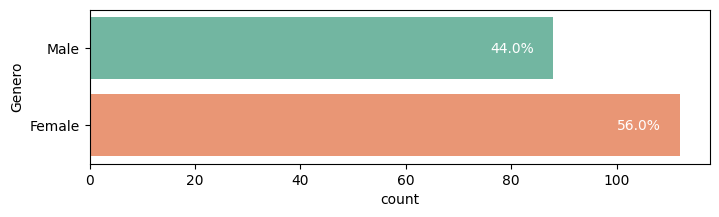

In [13]:
count_genero = df['Genero'].value_counts()  # Conta o número de ocorrências de cada gênero

plt.figure(1 , figsize = (8 , 2))
sns.countplot(y = 'Genero', hue='Genero', data = df, palette='Set2')

for i in df['Genero'].unique():
    count = count_genero[i]
    percentage = (count / df.shape[0]) * 100
    plt.text(count - 12, i, f'{percentage:.1f}%', va='center', color='w')

plt.grid(False)
plt.show()

**Insights**

Gênero

* A distribuição de gênero é bastante equilibrada, com 56% de clientes mulheres e 44% de clientes homens.
* Pequena maioria feminina com 12% de diferença.

**Conclusão:** As mulheres compõem uma parcela um pouco maior da base de clientes do shopping.

4.1.3 Distribuições de características numéricas em relação a características categóricas

<Figure size 800x600 with 0 Axes>

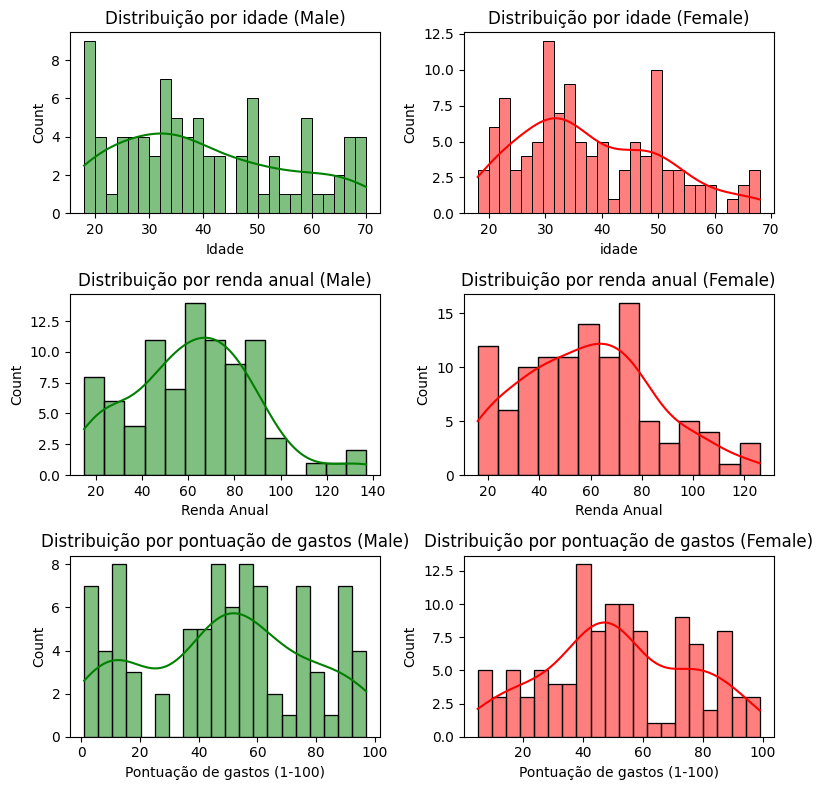

In [14]:
plt.figure(figsize=(8, 6))

fig, axes = plt.subplots(3, 2, figsize=(8, 8))

# Plot 1: Distribuição etária para homens
sns.histplot(df[df['Genero'] == 'Male']['Idade'], kde=True, color='g', ax=axes[0, 0], bins=26)
axes[0, 0].set_title('Distribuição por idade (Male)')
axes[0, 0].set_xlabel('Idade')
axes[0, 0].set_ylabel('Count')

# Plot 2: Distribuição etária para mulheres
sns.histplot(df[df['Genero'] == 'Female']['Idade'], kde=True, color='r', ax=axes[0, 1], bins=26)
axes[0, 1].set_title('Distribuição por idade (Female)')
axes[0, 1].set_xlabel('idade')
axes[0, 1].set_ylabel('Count')

# Plot 3: Distribuição de renda anual para homens
sns.histplot(df[df['Genero'] == 'Male']['Renda_Anual'], kde=True, color='g', ax=axes[1, 0], bins=14)
axes[1, 0].set_title('Distribuição por renda anual (Male)')
axes[1, 0].set_xlabel('Renda Anual')
axes[1, 0].set_ylabel('Count')

# Plot 4: Distribuição de renda anual para mulheres
sns.histplot(df[df['Genero'] == 'Female']['Renda_Anual'], kde=True, color='r', ax=axes[1, 1], bins=14)
axes[1, 1].set_title('Distribuição por renda anual (Female)')
axes[1, 1].set_xlabel('Renda Anual')
axes[1, 1].set_ylabel('Count')

# Plot 5: Distribuição de pontuação de gastos para homens
sns.histplot(df[df['Genero'] == 'Male']['Pontuacao_gastos(1-100)'], kde=True, color='g', ax=axes[2, 0], bins=20)
axes[2, 0].set_title('Distribuição por pontuação de gastos (Male)')
axes[2, 0].set_xlabel('Pontuação de gastos (1-100)')
axes[2, 0].set_ylabel('Count')

# Plot 6: Distribuição de pontuação de gastos para mulheres
sns.histplot(df[df['Genero'] == 'Female']['Pontuacao_gastos(1-100)'], kde=True, color='r', ax=axes[2, 1], bins=20)
axes[2, 1].set_title('Distribuição por pontuação de gastos (Female)')
axes[2, 1].set_xlabel('Pontuação de gastos (1-100)')
axes[2, 1].set_ylabel('Count')

plt.tight_layout()

plt.show()

<Figure size 1500x800 with 0 Axes>

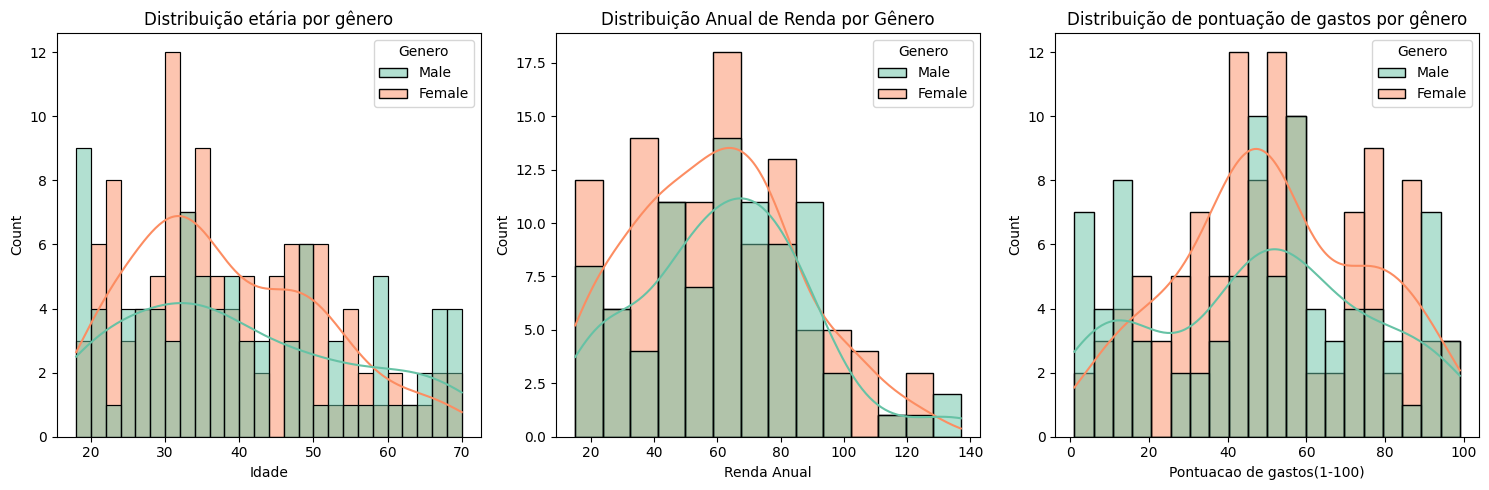

In [15]:
plt.figure(figsize=(15, 8))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Distribuição etária para ambos os sexos
sns.histplot(df, x='Idade', hue='Genero', kde=True, ax=axes[0], bins=26, palette='Set2')
axes[0].set_title('Distribuição etária por gênero')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Count')

# Plot 2: Distribuição anual de renda para ambos os sexos
sns.histplot(df, x='Renda_Anual', hue='Genero', kde=True, ax=axes[1], bins=14, palette='Set2')
axes[1].set_title('Distribuição Anual de Renda por Gênero')
axes[1].set_xlabel('Renda Anual')
axes[1].set_ylabel('Count')

# Plot 3: Distribuição da pontuação de gastos para ambos os sexos
sns.histplot(df, x='Pontuacao_gastos(1-100)', hue='Genero', kde=True, ax=axes[2], bins=20, palette='Set2')
axes[2].set_title('Distribuição de pontuação de gastos por gênero')
axes[2].set_xlabel('Pontuacao de gastos(1-100)')
axes[2].set_ylabel('Count')

plt.tight_layout()

plt.show()

4.2.1 Relações entre features

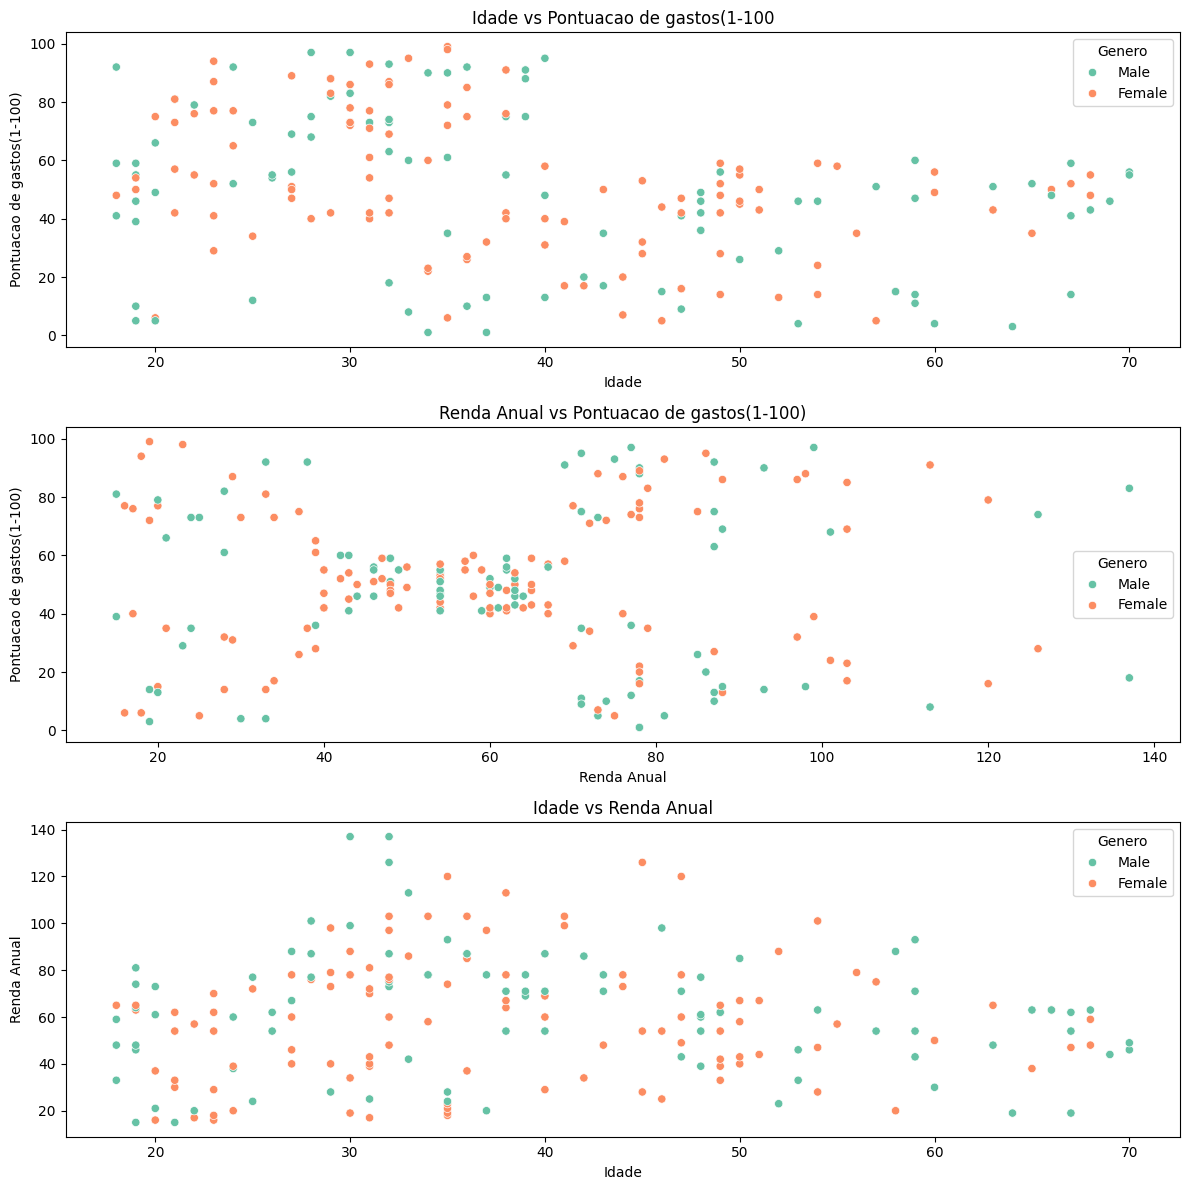

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Gráfico de dispersão para pontuação de gastos vs idade
sns.scatterplot(x='Idade', y='Pontuacao_gastos(1-100)', hue='Genero', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Idade vs Pontuacao de gastos(1-100')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Pontuacao de gastos(1-100)')

# Diagrama de dispersão para renda anual vs pontuação de gastos
sns.scatterplot(x='Renda_Anual', y='Pontuacao_gastos(1-100)', hue='Genero', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Renda Anual vs Pontuacao de gastos(1-100)')
axes[1].set_xlabel('Renda Anual')
axes[1].set_ylabel('Pontuacao de gastos(1-100)')

# Diagrama de dispersão para Idade vs Renda Anual
sns.scatterplot(x='Idade', y='Renda_Anual', hue='Genero', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Idade vs Renda Anual')
axes[2].set_xlabel('Idade')
axes[2].set_ylabel('Renda Anual')

plt.tight_layout()


plt.show()

**Insights**
* O gráfico com relação ao gênero não parece ter nenhum impacto nos clusters.
* Renda Anual vs Pontuação de gastos é o único gráfico em que podemos ver alguns clusters se formando.

**Conclusão:** Não será utilizada a feature de gênero daqui em diante

4.2.2 Plot entre as features mais importantes

In [17]:
# Criar gráfico de dispersão
fig = go.Figure(data=[go.Scatter3d(
    x=df['Idade'],
    y=df['Renda_Anual'],
    z=df['Pontuacao_gastos(1-100)'],
    mode='markers',
    marker=dict(
        size=4,
        opacity=0.7,
    )
)])
# Adicionando títulos de eixo
fig.update_layout(
    scene=dict(
        xaxis_title='Idade',
        yaxis_title='Renda Anual',
        zaxis_title='Pontuacao de gastos(1-100)'
    ),
    title='Gráfico de dispersão interativo 3D de clientes de shopping'
)

fig.show()

**Insights**
* Temos 5-6 clusters que este gráfico mostra

# 5) Agrupamento usando K-Means

5.1 Determinando o número de clusters usando o método elbow

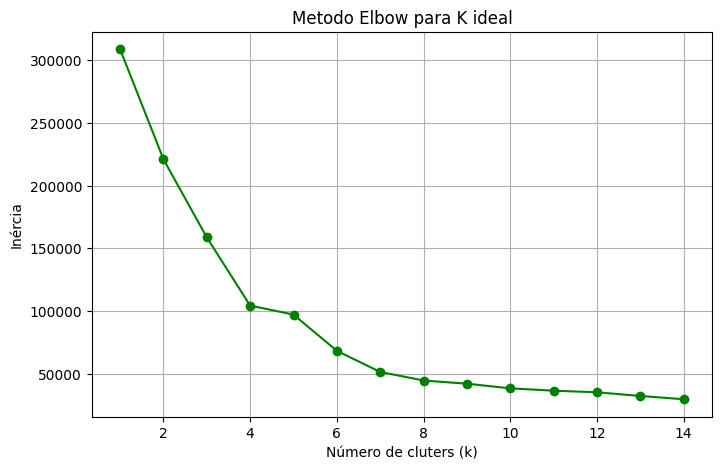

In [18]:
# Define um intervalo de números de potenciais clusters
k_values = range(1, 15)
inertia_values = []

# Calcular a inércia para cada k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Idade', 'Renda_Anual', 'Pontuacao_gastos(1-100)']])
    inertia_values.append(kmeans.inertia_)

# Traça os valores de inércia em relação a k
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', color='g')
plt.title('Metodo Elbow para K ideal', color='black')
plt.xlabel('Número de cluters (k)', color='black')
plt.ylabel('Inércia', color='black')
plt.grid(True)
plt.show()

* Vamos tentar os clusters 5 e 6

5.2 K-Means clustering

5.2.1 Clustering em k=5

In [19]:
# copiando o dataframe
df_k5 = df.copy(deep=True)

# Aplicando o K-Means clustering com k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=20)
df_k5['Cluster'] = kmeans.fit_predict(df[['Idade', 'Renda_Anual', 'Pontuacao_gastos(1-100)']])

df_k5.sample(5)

,ID_cliente,Genero,Idade,Renda_Anual,Pontuacao_gastos(1-100),Cluster
19,20,Female,35,23,98,4
89,90,Female,50,58,46,1
44,45,Female,49,39,28,0
189,190,Female,36,103,85,2
32,33,Male,53,33,4,0


In [20]:
# Cria um gráfico de dispersão 3D com clusters
fig = go.Figure()

# Define uma cor para cada cluster
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Add data for each cluster to the plot
for cluster in range(5):
    clustered_data = df_k5[df_k5['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=clustered_data['Idade'],
        y=clustered_data['Renda_Anual'],
        z=clustered_data['Pontuacao_gastos(1-100)'],
        mode='markers',
        marker=dict(
            size=5,
            color=colors[cluster],
            opacity=0.8,
        ),
        name=f'Cluster {cluster + 1}'
    ))

# Define títulos para os eixos
fig.update_layout(
    scene=dict(
        xaxis_title='Idade',
        yaxis_title='Renda Anual',
        zaxis_title='Pontuacao gastos(1-100)'
    ),
    title='Gráfico de dispersão interativo 3D de grupos de clientes de shopping'
)

fig.show()

* O centro dos dados não parece estar certo aqui

5.2.2 Clustering em k=6

In [21]:
# copiando o dataframe
df_k6 = df.copy(deep=True)

# Aplicando o K-Means clustering com k=6
kmeans = KMeans(n_clusters=6, random_state=42,  n_init=20)
df_k6['Cluster'] = kmeans.fit_predict(df[['Idade', 'Renda_Anual', 'Pontuacao_gastos(1-100)']])

df_k5.sample(5)

,ID_cliente,Genero,Idade,Renda_Anual,Pontuacao_gastos(1-100),Cluster
52,53,Female,31,43,54,1
111,112,Female,19,63,54,1
84,85,Female,21,54,57,1
142,143,Female,28,76,40,1
172,173,Male,36,87,10,3


In [22]:
fig = go.Figure()

colors = ['yellow', 'red', 'blue', 'green', 'purple', 'orange']

for cluster in range(6):
    clustered_data = df_k6[df_k6['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=clustered_data['Idade'],
        y=clustered_data['Renda_Anual'],
        z=clustered_data['Pontuacao_gastos(1-100)'],
        mode='markers',
        marker=dict(
            size=5,
            color=colors[cluster],
            opacity=0.8,
        ),
        name=f'Cluster {cluster + 1}'
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='Idade',
        yaxis_title='Renda Anual',
        zaxis_title='Pontuacao de gastos(1-100)'
    ),
    title='Gráfico de dispersão interativo 3D de grupos de clientes de shopping'
)


fig.show()

* Aqui obtemos melhores resultado

Identificando o grupo de clientes que possuem a menor **dispersão**

In [23]:
cluster_dispersion = []

# Calcula a dispersão (variância) para cada cluster
for cluster in range(6):
    clustered_data = df_k6[df_k6['Cluster'] == cluster]

    # Calcula a variância para as três variáveis
    variance_idade = clustered_data['Idade'].var()
    variance_renda = clustered_data['Renda_Anual'].var()
    variance_gastos = clustered_data['Pontuacao_gastos(1-100)'].var()

    # Soma as variâncias para obter uma métrica geral de dispersão
    total_variance = variance_idade + variance_renda + variance_gastos
    cluster_dispersion.append((cluster, total_variance))  # Salva o cluster e a dispersão

# Ordena os clusters pela dispersão (do menor para o maior)
clusters_sorted_by_dispersion = sorted(cluster_dispersion, key=lambda x: x[1])

# Exibe os clusters em ordem de dispersão
print("Clusters ordenados por dispersão (do menor para o maior):")
for cluster, dispersion in clusters_sorted_by_dispersion:
    print(f"Cluster {cluster + 1 }: Dispersão Total = {dispersion:.2f}")


Clusters ordenados por dispersão (do menor para o maior):
Cluster 1: Dispersão Total = 183.23
Cluster 3: Dispersão Total = 195.23
Cluster 4: Dispersão Total = 209.27
Cluster 5: Dispersão Total = 367.69
Cluster 6: Dispersão Total = 386.62
Cluster 2: Dispersão Total = 490.91


In [24]:
cluster_dispersion = []

# Calcula a dispersão (variância) para cada cluster
for cluster in range(6):
    clustered_data = df_k6[df_k6['Cluster'] == cluster]

    # Calcula a variância para as três variáveis
    variance_idade = clustered_data['Idade'].var()
    variance_renda = clustered_data['Renda_Anual'].var()
    variance_gastos = clustered_data['Pontuacao_gastos(1-100)'].var()

    # Soma as variâncias para obter uma métrica geral de dispersão
    total_variance = variance_idade + variance_renda + variance_gastos
    cluster_dispersion.append(total_variance)

# Encontra o índice do cluster com a menor dispersão
min_dispersion_cluster = cluster_dispersion.index(min(cluster_dispersion))

print(f'O grupo de clientes com a menor dispersão é o Cluster {min_dispersion_cluster + 1}')

O grupo de clientes com a menor dispersão é o Cluster 1


In [25]:
#CONEXÃO COM O STREAMLIT
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [26]:
!wget -q -O - ipv4.icanhazip.com

34.171.135.49


In [27]:
!streamlit run app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
⠙⠹⠸⠼⠴⠦⠧⠇⠏Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) ^C
